In [55]:
import pandas as pd
import numpy as np

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
train = pd.read_csv('titanic_train.csv')

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


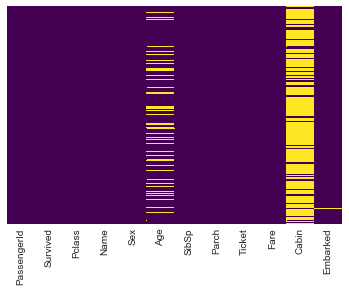

In [59]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

missing data is in yellow 

In [60]:
sns.set_style('whitegrid')

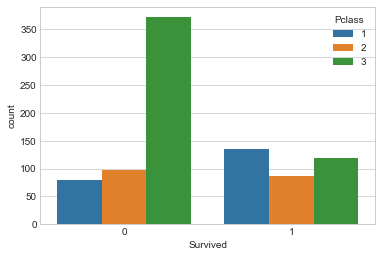

In [61]:
sns.countplot(x='Survived',hue = 'Pclass',data = train )

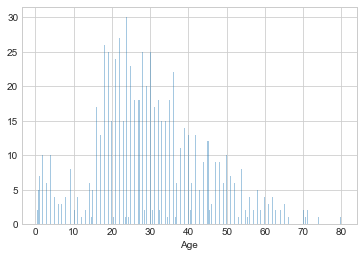

In [62]:
sns.distplot(train['Age'].dropna(),kde=False,bins=300)

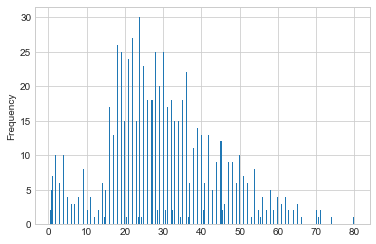

In [63]:
train['Age'].plot.hist(bins=300)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


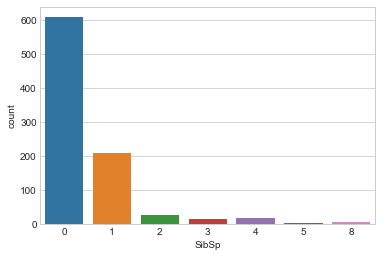

In [65]:
sns.countplot(x='SibSp' , data = train)

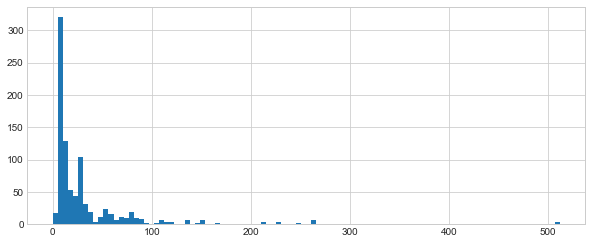

In [66]:
train['Fare'].hist(bins=100,figsize = (10,4))

In [67]:
import cufflinks as cf

In [68]:
cf.go_offline()

In [69]:
#train['Fare'].iplot(kind = 'hist', bins=50)

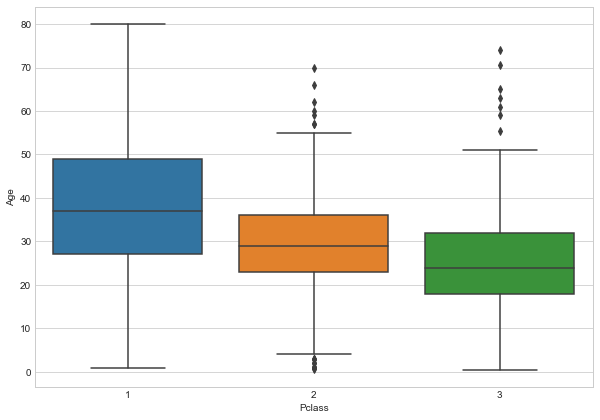

In [70]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass' ,y = 'Age', data = train)

In [71]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [72]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

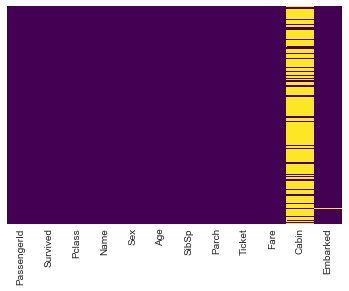

In [73]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis' )

In [74]:
train.drop('Cabin',axis=1,inplace=True)

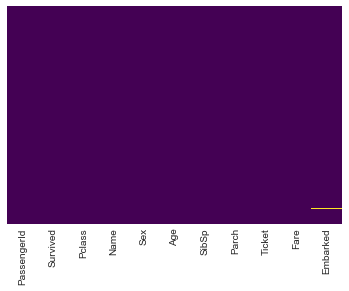

In [75]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis' )

In [76]:
train.dropna(inplace=True)

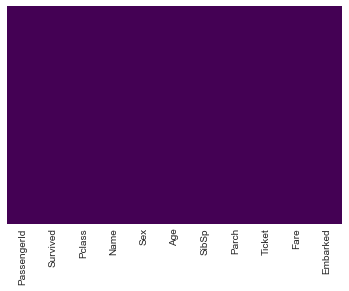

In [77]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis' )

In [78]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [79]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [80]:
train = pd.concat([train,sex,embark],axis=1)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [82]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [84]:
train.drop('PassengerId',axis=1,inplace=True)

In [85]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [86]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [87]:
from sklearn.cross_validation import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logmodel = LogisticRegression()

In [91]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
predictions = logmodel.predict(X_test)

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])

In [98]:
train2 =  pd.read_csv('titanic_train.csv')

In [125]:
train2['status'] = train2['Name'].apply(lambda title:title.split('.')[0])

In [126]:
train2['status'].head()

0         Braund, Mr
1       Cumings, Mrs
2    Heikkinen, Miss
3      Futrelle, Mrs
4          Allen, Mr
Name: status, dtype: object

In [127]:
train2['status'] = train2['status'].apply(lambda title:title.split(',')[1])

In [128]:
train2['status'].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: status, dtype: object

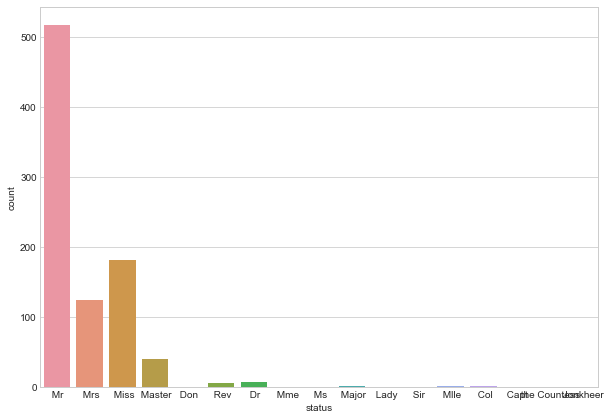

In [142]:
plt.figure(figsize=(10,7))
sns.countplot(x='status',data = train2 )